In [1]:
import numpy as np
from plotnine import *
import pandas as pd

In [2]:
results = pd.read_csv("benchmark_results.csv", sep='\t')

In [3]:
nbse_info = pd.read_csv("nbse_sets.csv")

In [4]:
data = results.merge(nbse_info, left_on=['name'], right_on=['set_name'])
data['mcs_size_to_atom_size'] = data['mcs_atoms'] / data['avg_atoms']
data = data.query('local_similarity > 0 and took < 900')
data.set_index(['name', 'optimizer_steps', 'optimizer_fine', 'optimizer_coarse',
                'num_conformers', 'core', 'assemblies'])

took  \
name optimizer_steps optimizer_fine optimizer_coarse num_conformers core assemblies         
3ke8 100             0.01           0.3              40             mcs  10            18   
2vke 100             0.01           0.3              40             mcs  10           218   
1odn 100             0.01           0.3              40             mcs  10           303   
4dko 100             0.01           0.3              40             mcs  10            43   
3qqs 100             0.01           0.3              40             mcs  10            48   
...                                                                                   ...   
1d0s 100             0.80           0.8              10             mcs  10            10   
                     0.10           0.8              10             mcs  10            59   
                     0.50           0.8              10             mcs  10            11   
                     0.30           0.8              10             mcs  10            62   
                     0.40           0.9              10             mcs  10            38   

                                                                                     local_similarity  \
name optimizer_steps optimizer_fine optimizer_coarse num_conformers core assemblies                     
3ke8 100             0.01           0.3              40             mcs  10                  0.664895   
2vke 100             0.01           0.3              40             mcs  10                  0.653470   
1odn 100             0.01           0.3              40             mcs  10                  0.569305   
4dko 100             0.01           0.3              40             mcs  10                  0.579109   
3qqs 100             0.01           0.3              40             mcs  10                  0.619915   
...                                                                                               ...   
1d0s 100             0.80           0.8              10             mcs  10                  0.537570   
                     0.10           0.8              10             mcs  10                  0.630062   
                     0.50           0.8              10             mcs  10                  0.558835   
                     0.30           0.8              10             mcs  10                  0.630053   
                     0.40           0.9              10             mcs  10                  0.602666   

                                                                                     avg_conformer_tanimoto_dist  \
name optimizer_steps optimizer_fine optimizer_coarse num_conformers core assemblies                                
3ke8 100             0.01           0.3              40             mcs  10                             0.629946   
2vke 100             0.01           0.3              40             mcs  10                             0.613581   
1odn 100             0.01           0.3              40             mcs  10                             0.657672   
4dko 100             0.01           0.3              40             mcs  10                             0.458960   
3qqs 100             0.01           0.3              40             mcs  10                             0.311268   
...                                                                                                          ...   
1d0s 100             0.80           0.8              10             mcs  10                             0.415822   
                     0.10           0.8              10             mcs  10                             0.406054   
                     0.50           0.8              10             mcs  10                             0.416812   
                     0.30           0.8              10             mcs  10                             0.406048   
                     0.40           0.9              10             mcs  10                             0.397833   



In [5]:
data[data.name == ('1odn')]

,name,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,divide,...,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,avg_atoms_to_mcs,mcs_size_to_atom_size
2,1odn,303,0.569305,0.657672,3.152543,0.3,0.01,40,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
35,1odn,176,0.622042,0.482279,2.164893,0.5,0.01,10,1,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
66,1odn,269,0.500458,0.624170,2.990656,0.5,0.01,30,1,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
97,1odn,263,0.567596,0.564154,2.747688,0.5,0.01,60,1,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
129,1odn,245,0.622042,0.482279,2.164893,0.3,0.01,10,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
160,1odn,241,0.622042,0.482279,2.164893,0.3,0.01,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
191,1odn,261,0.622042,0.482279,2.164893,0.5,0.05,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
222,1odn,235,0.622042,0.482279,2.164893,0.5,0.10,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
253,1odn,256,0.622042,0.482279,2.164893,0.5,0.20,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531
290,1odn,235,0.498690,0.516919,2.811439,0.6,0.10,20,10,True,...,30,29,18,17,15,28,24.251,NaN,61.85%,0.618531


In [6]:
data.describe()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,mcs_size_to_atom_size
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.0,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,0.0,297.000000
mean,131.006734,0.518181,0.470836,4.080295,0.445118,0.056599,26.026936,6.939394,100.0,31.794613,34.340067,15.383838,16.026936,9.417508,17.070707,22.815983,NaN,0.413230
std,122.384998,0.097381,0.109897,1.415802,0.115305,0.108672,15.737692,4.270780,0.0,8.964734,9.942173,5.073195,5.779093,3.730005,6.223733,5.738331,NaN,0.116266
min,1.000000,0.297835,0.174775,1.647598,0.300000,0.010000,10.000000,1.000000,100.0,12.000000,12.000000,9.000000,9.000000,4.000000,12.000000,10.769000,NaN,0.197371
25%,42.000000,0.449634,0.392778,2.889359,0.300000,0.010000,20.000000,1.000000,100.0,26.000000,29.000000,11.000000,11.000000,7.000000,13.000000,19.176000,NaN,0.318590
50%,101.000000,0.534986,0.481296,3.746291,0.500000,0.010000,20.000000,10.000000,100.0,30.000000,32.000000,14.000000,15.000000,9.000000,15.000000,21.560000,NaN,0.375834
75%,187.000000,0.610423,0.538214,5.187691,0.500000,0.050000,30.000000,10.000000,100.0,37.000000,41.000000,18.000000,20.000000,11.000000,19.000000,26.077000,NaN,0.475160
max,865.000000,0.719335,0.737755,8.482188,1.000000,1.000000,60.000000,10.000000,100.0,73.000000,80.000000,31.000000,34.000000,22.000000,40.000000,37.294000,NaN,0.751007


In [7]:
metric_cols = ['siena_rmsd', 'avg_conformer_tanimoto_dist',
               'local_similarity']

program_parameters = ['assemblies', 'num_conformers', 'optimizer_coarse',
                      'optimizer_fine', 'optimizer_steps']

set_props = [str(c) for c in nbse_info.columns] + ['mcs_size_to_atom_size']

def lookup_de_name(s: str) -> str:
    name_lookup_de = {
        'name': 'Name',
        'took': 'Laufzeit',
        'siena_rmsd': 'SIENA RMSD',
        'avg_conformer_tanimoto_dist': 'Konformer Distanz',
        'local_similarity': 'Lokale Ähnlichkeit',
        'most_atoms': 'Meiste Atome',
        'least_atoms': 'Kleinste Atome',
        'most_bonds': 'Meiste Bindungen',
        'least_bonds': 'Wenigste Bindungen',
        'num_mols': 'Menge Moleküle',
        'avg_atoms': 'Durschn. Atome',
        'mcs_atoms': 'Größe MCS',
        'mcs_size_to_atom_size': 'MCS / Durchschn. Atome',
        'optimizer_coarse': 'Optimizer Coarse',
        'optimizer_fine': 'Optimizer Fine',
        'optimizer_steps': 'Optimizer Steps',
        'num_conformers': 'Konformere',
        'assemblies': 'Assemblies'
    }
    
    if s in name_lookup_de:
        return name_lookup_de[s]
    else:
        return s


In [8]:
metrics = data.drop(columns=['set_name', 'name', 'divide', 'core', 'mcs_bonds',
                             'avg_atoms_to_mcs'])
metrics.var()

took                           14978.087792
local_similarity                   0.009483
avg_conformer_tanimoto_dist        0.012077
siena_rmsd                         2.004497
optimizer_coarse                   0.013295
optimizer_fine                     0.011810
num_conformers                   247.674948
assemblies                        18.239558
optimizer_steps                    0.000000
most_atoms                        80.366457
most_bonds                        98.846801
least_atoms                       25.737305
least_bonds                       33.397921
mcs_atoms                         13.912936
num_mols                          38.734848
avg_atoms                         32.928437
mcs_size_to_atom_size              0.013518
dtype: float64

In [45]:
data.groupby(program_parameters).agg({ k: 'mean' for k in metrics})

took  \
assemblies num_conformers optimizer_coarse optimizer_fine optimizer_steps               
1          10             0.5              0.01           100              106.218750   
           30             0.5              0.01           100              110.870968   
           60             0.5              0.01           100              164.894737   
10         10             0.3              0.01           100              146.419355   
                          0.8              0.10           100               59.000000   
                                           0.30           100               62.000000   
                                           0.50           100               11.000000   
                                           0.80           100               10.000000   
                          0.9              0.40           100               38.000000   
                          1.0              0.80           100                7.000000   
                                           1.00           100                5.000000   
           20             0.3              0.01           100              136.225806   
                          0.5              0.05           100              121.548387   
                                           0.10           100              117.322581   
                                           0.20           100              118.741935   
                          0.6              0.10           100              235.000000   
           40             0.3              0.01           100              167.636364   

                                                                           local_similarity  \
assemblies num_conformers optimizer_coarse optimizer_fine optimizer_steps                     
1          10             0.5              0.01           100                      0.511705   
           30             0.5              0.01           100                      0.512818   
           60             0.5              0.01           100                      0.508079   
10         10             0.3              0.01           100                      0.519407   
                          0.8              0.10           100                      0.630062   
                                           0.30           100                      0.630053   
                                           0.50           100                      0.558835   
                                           0.80           100                      0.537570   
                          0.9              0.40           100                      0.602666   
                          1.0              0.80           100                      0.537570   
                                           1.00           100                      0.537570   
           20             0.3              0.01           100                      0.520859   
                          0.5              0.05           100                      0.519035   
                                           0.10           100                      0.519035   
                                           0.20           100                      0.519035   
                          0.6              0.10           100                      0.498690   
           40             0.3              0.01           100                      0.523308   

                                                                           avg_conformer_tanimoto_dist  \
assemblies num_conformers optimizer_coarse optimizer_fine optimizer_steps                                
1          10             0.5              0.01           100                                 0.468461   
           30             0.5              0.01           100                                 0.475280   
           60             0.5              0.01           100                                 0.475930   
10         10             0.3              0.01      

In [9]:
etrics.head()

,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,optimizer_steps,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_size_to_atom_size
0,18,0.664895,0.629946,2.792387,0.3,0.01,40,10,100,17,17,12,11,11,17,14.647,0.751007
1,218,0.653470,0.613581,2.697748,0.3,0.01,40,10,100,42,45,31,34,22,12,33.522,0.656285
2,303,0.569305,0.657672,3.152543,0.3,0.01,40,10,100,30,29,18,17,15,28,24.251,0.618531
3,43,0.579109,0.458960,4.240663,0.3,0.01,40,10,100,30,33,23,24,15,13,26.077,0.575220
4,48,0.619915,0.311268,5.187691,0.3,0.01,40,10,100,29,31,10,10,8,19,14.789,0.540943


In [10]:
metrics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
took,297.0,131.006734,122.384998,1.000000,42.000000,101.000000,187.000000,865.000000
local_similarity,297.0,0.518181,0.097381,0.297835,0.449634,0.534986,0.610423,0.719335
avg_conformer_tanimoto_dist,297.0,0.470836,0.109897,0.174775,0.392778,0.481296,0.538214,0.737755
siena_rmsd,297.0,4.080295,1.415802,1.647598,2.889359,3.746291,5.187691,8.482188
optimizer_coarse,297.0,0.445118,0.115305,0.300000,0.300000,0.500000,0.500000,1.000000
optimizer_fine,297.0,0.056599,0.108672,0.010000,0.010000,0.010000,0.050000,1.000000
num_conformers,297.0,26.026936,15.737692,10.000000,20.000000,20.000000,30.000000,60.000000
assemblies,297.0,6.939394,4.270780,1.000000,1.000000,10.000000,10.000000,10.000000
optimizer_steps,297.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
most_atoms,297.0,31.794613,8.964734,12.000000,26.000000,30.000000,37.000000,73.000000


In [11]:
correlation = 'pearson'
correlations = metrics.corr(method=correlation)

In [12]:
corr = correlations.stack().reset_index()
corr.columns = ['var1', 'var2', 'val']
corr_config = corr.loc[corr['var2'].isin(metric_cols)]
corr_config = corr_config.loc[corr['var1'].isin(set_props)]
corr_config = corr_config.round({'val': 3})

corr_config['var1'] = corr_config['var1'].map(lookup_de_name)
corr_config['var2'] = corr_config['var2'].map(lookup_de_name)


In [13]:
corr

,var1,var2,val
0,took,took,1.000000
1,took,local_similarity,-0.315910
2,took,avg_conformer_tanimoto_dist,0.090811
3,took,siena_rmsd,0.280267
4,took,optimizer_coarse,-0.152282
...,...,...,...
251,mcs_size_to_atom_size,least_bonds,0.222366
252,mcs_size_to_atom_size,mcs_atoms,0.694376
253,mcs_size_to_atom_size,num_mols,-0.019343
254,mcs_size_to_atom_size,avg_atoms,-0.016154


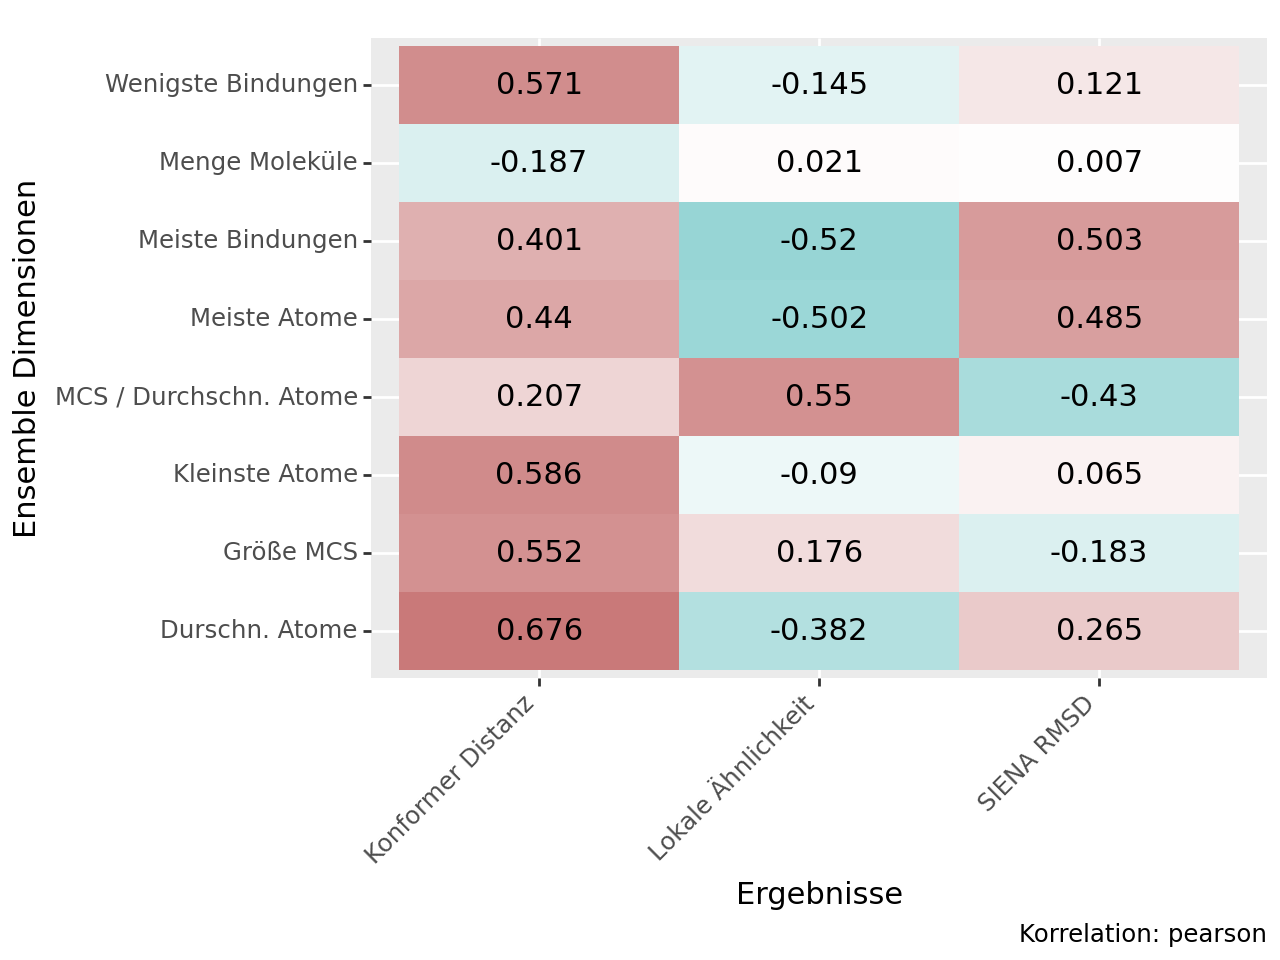

<Figure Size: (640 x 480)>

In [14]:
(ggplot(corr_config, mapping=aes('var2', 'var1', fill='val', label='val'))
 + geom_tile()
 + scale_fill_gradient2(low='#79c9c9', high='#C97979', guide=False)
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 + labs(x='Ergebnisse', y='Ensemble Dimensionen', caption='Korrelation: {}'.format(correlation))
 )

In [15]:
corr_metrics = corr[
    corr['var1'].isin(metric_cols) & corr['var2'].isin(metric_cols)]
corr_metrics = corr_metrics.round({'val': 3})

corr_metrics['var1'] = corr_metrics['var1'].map(lookup_de_name)
corr_metrics['var2'] = corr_metrics['var2'].map(lookup_de_name)


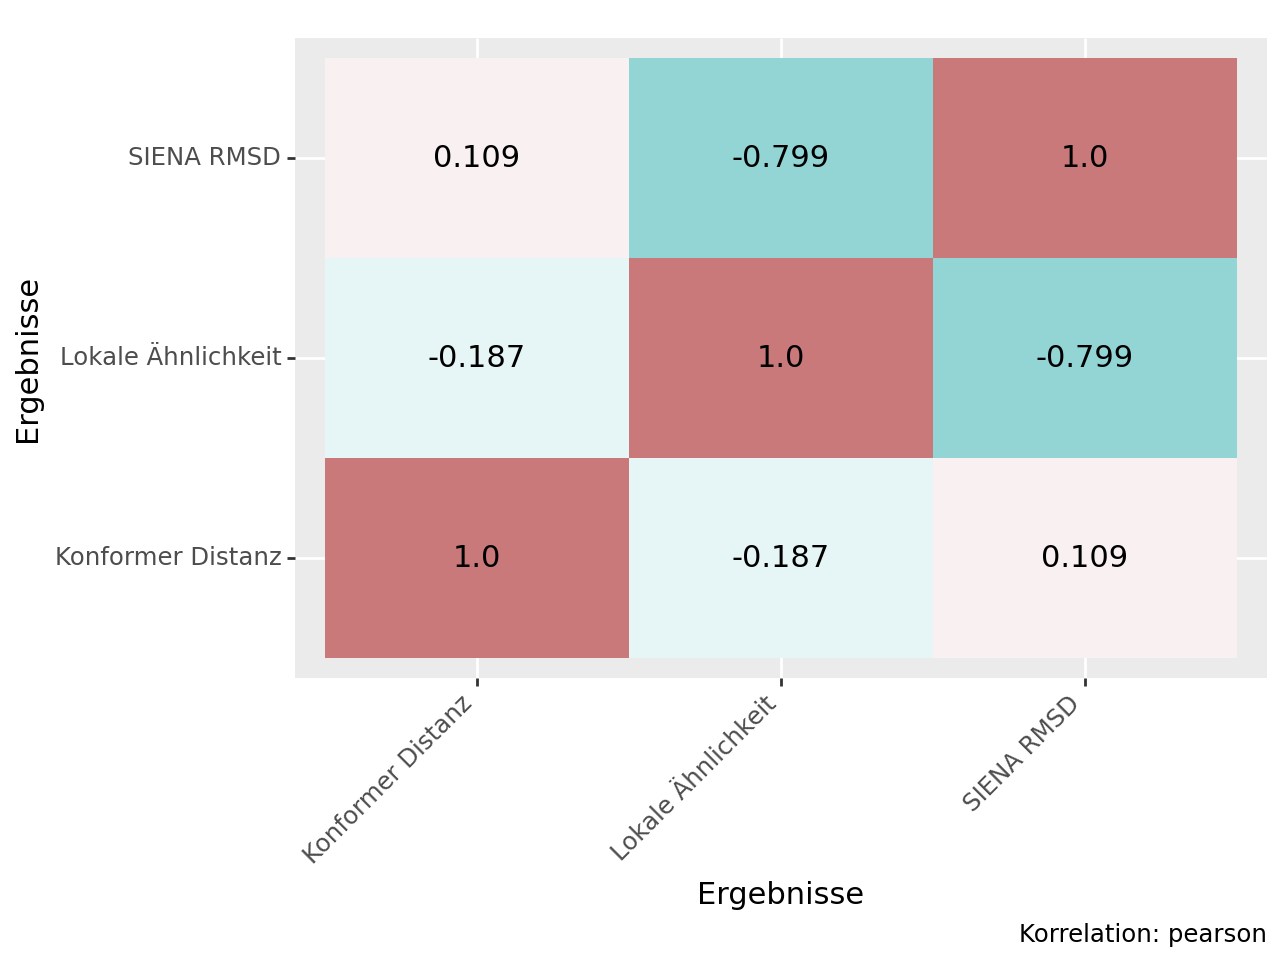

<Figure Size: (640 x 480)>

In [16]:
(ggplot(corr_metrics, mapping=aes('var1', 'var2', fill='val', label='val'))
 + geom_tile()
 + scale_fill_gradient2(low='#79c9c9', high='#C97979', guide=False)
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 + labs(x='Ergebnisse', y='Ergebnisse', caption='Korrelation: {}'.format(correlation))
 )

In [17]:
corr_options = corr[
    corr['var1'].isin(program_parameters) & corr['var2'].isin(metric_cols)]
corr_options = corr_options.round({'val': 3})
corr_options['var1'] = corr_options['var1'].map(lookup_de_name)
corr_options['var2'] = corr_options['var2'].map(lookup_de_name)


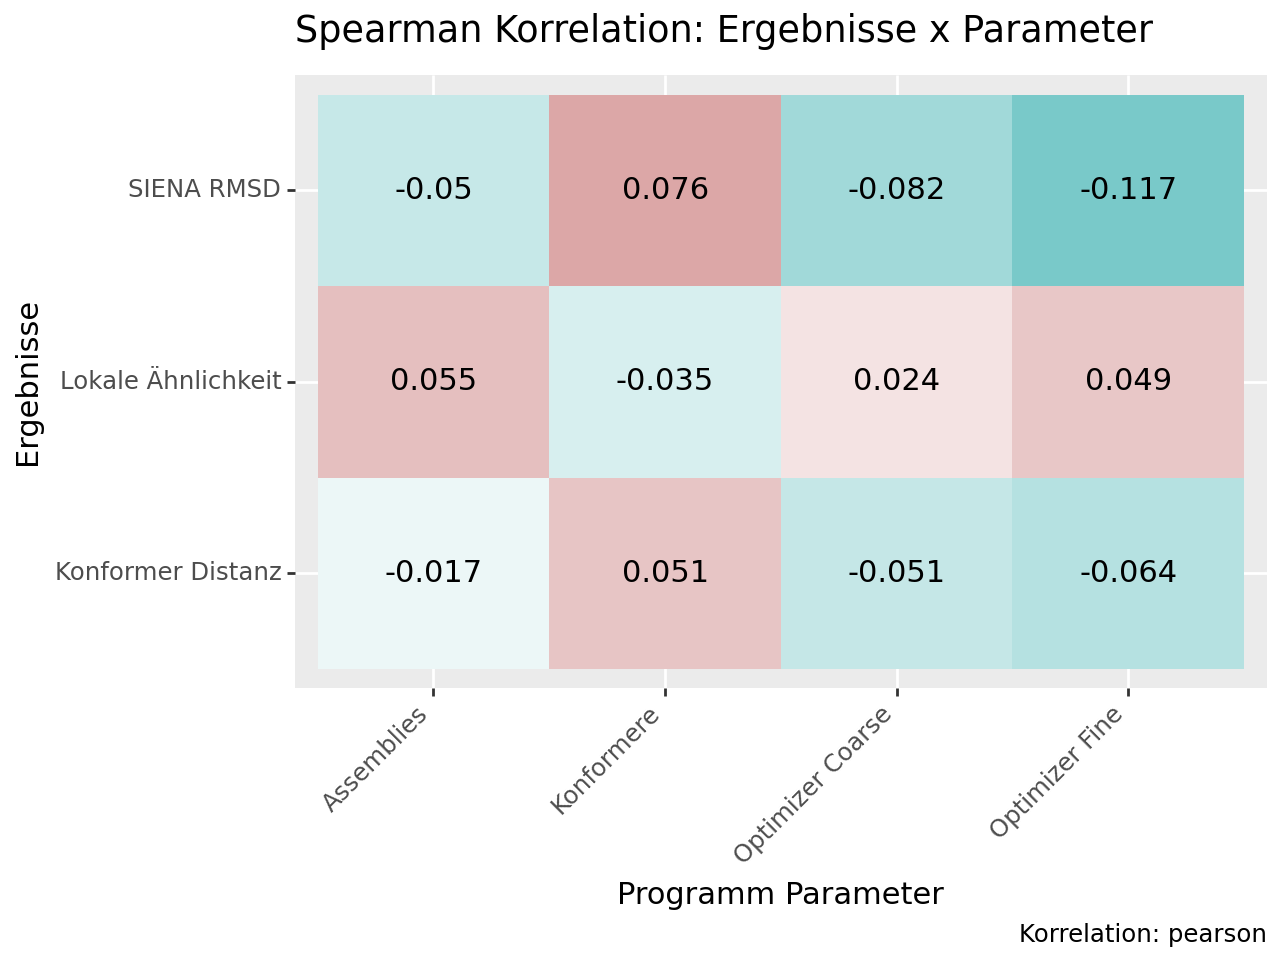

<Figure Size: (640 x 480)>

In [18]:
(ggplot(corr_options, mapping=aes('var1', 'var2', fill='val', label='val'))
 + ggtitle("Spearman Korrelation: Ergebnisse x Parameter")
 + geom_tile()
 + scale_fill_gradient2(low='#79c9c9', high='#C97979', guide=False)
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + geom_text()
 + labs(x='Programm Parameter', y='Ergebnisse',caption='Korrelation: {}'.format(correlation))
 )


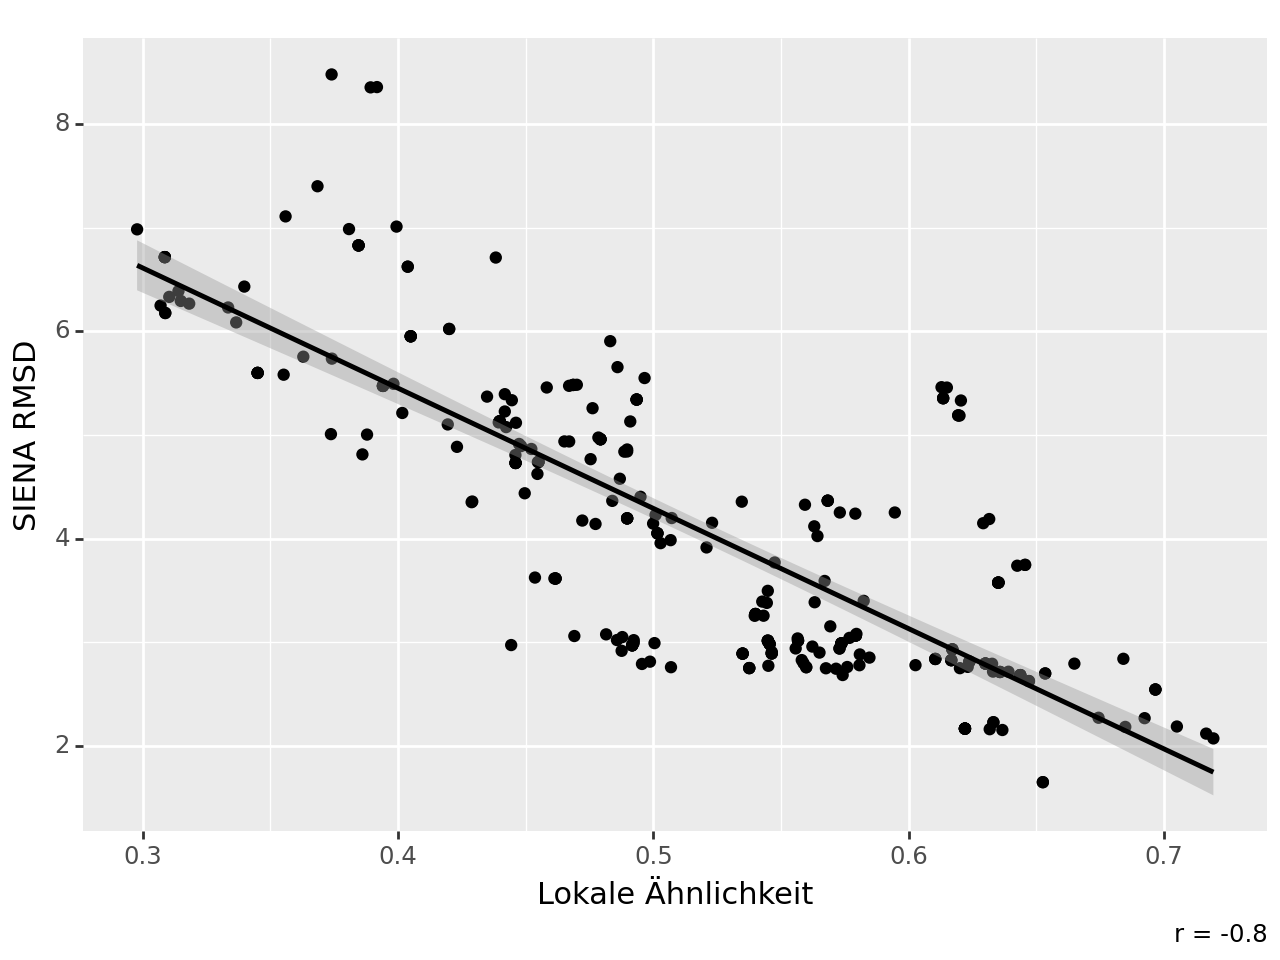

<Figure Size: (640 x 480)>

In [19]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm')
 + labs(x=lookup_de_name('local_similarity'), y=lookup_de_name('siena_rmsd'), caption='r = -0.8')
 )

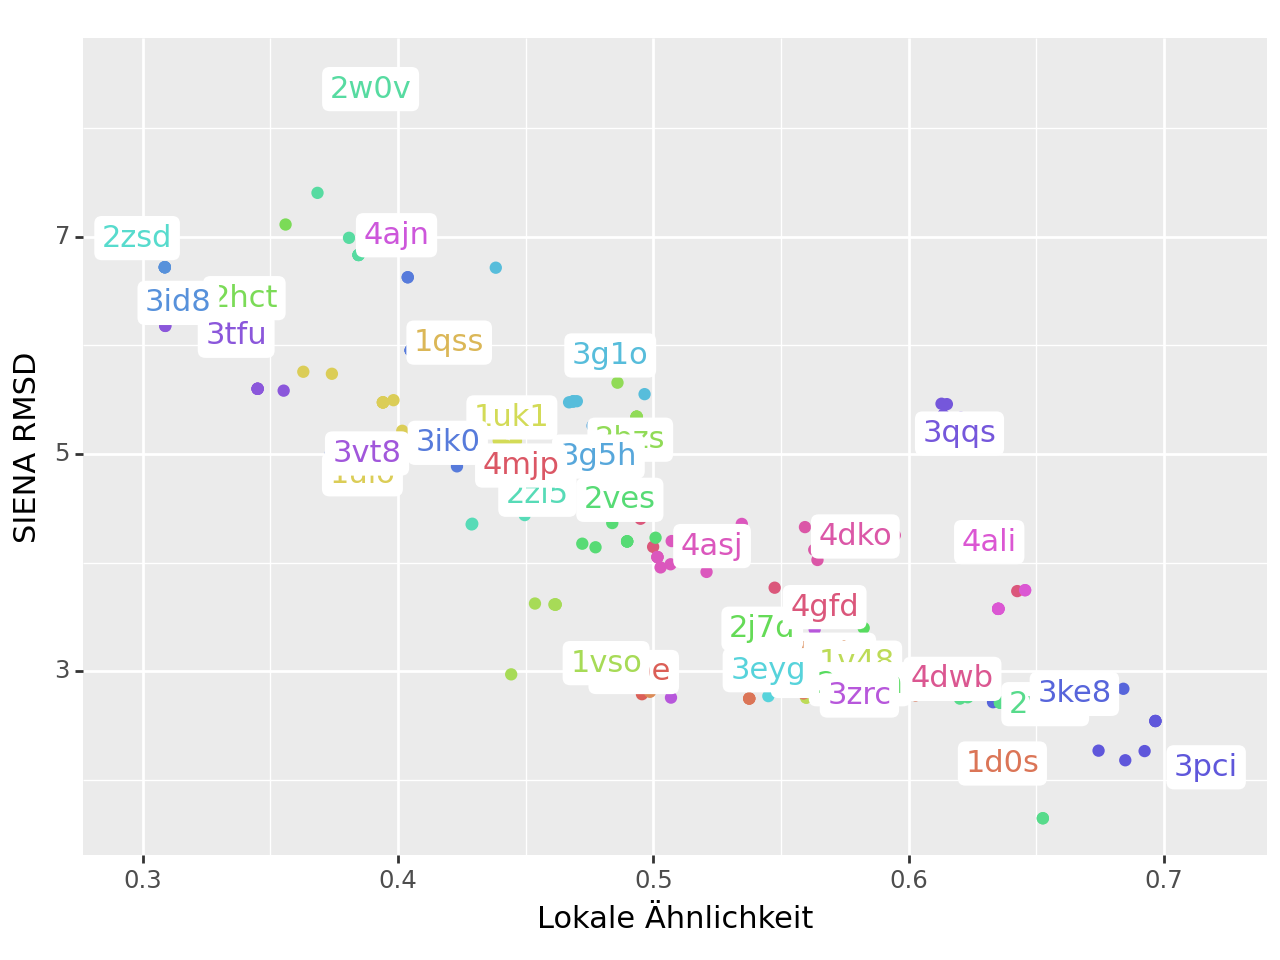

<Figure Size: (640 x 480)>

In [20]:
(ggplot(data=data,
        mapping=aes(x='local_similarity', y='siena_rmsd', colour='name',
                    label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 + labs(x=lookup_de_name('local_similarity'), y=lookup_de_name('siena_rmsd'))
 )


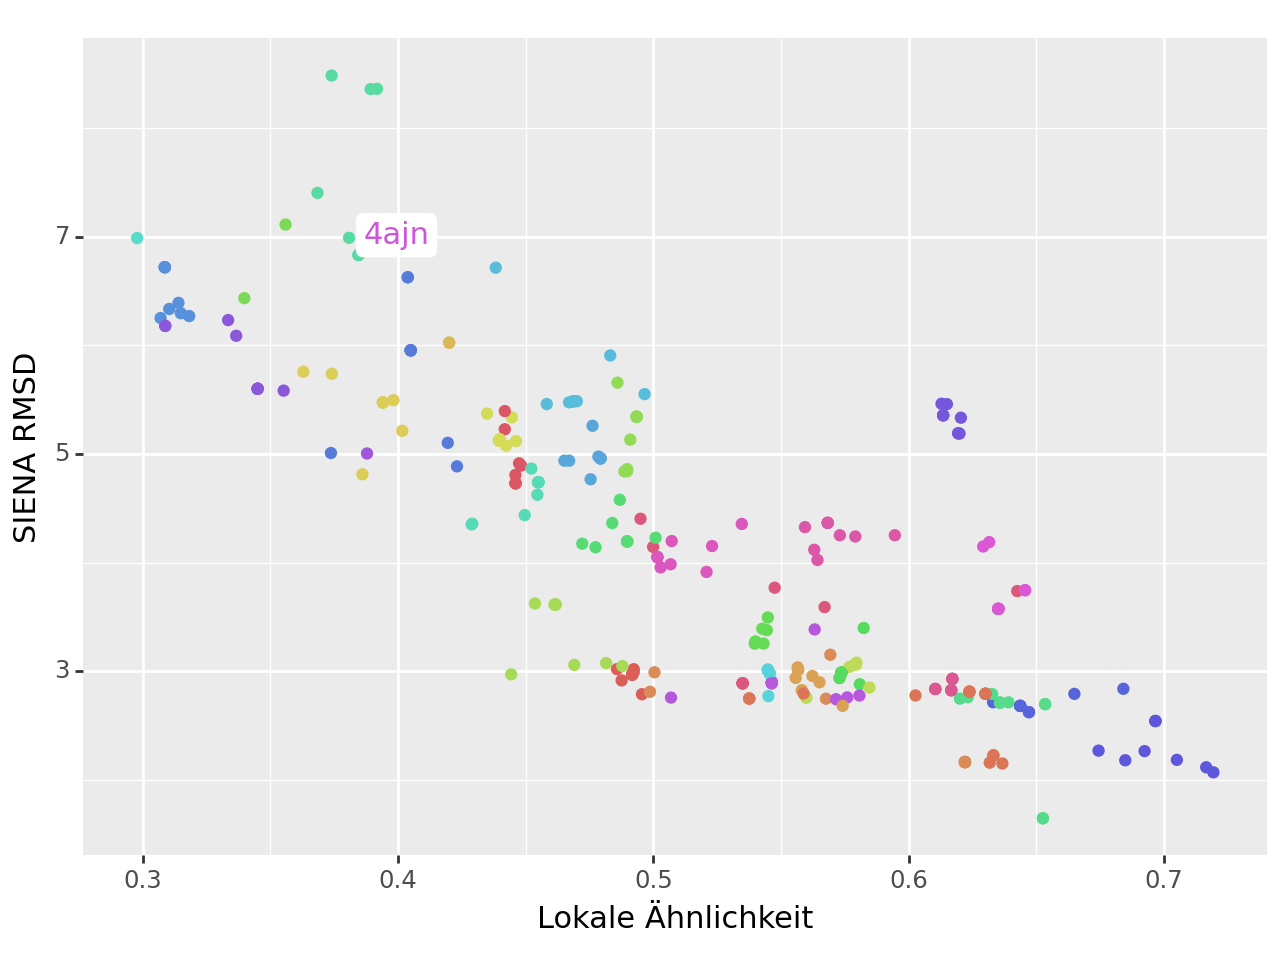

<Figure Size: (640 x 480)>

In [21]:
(ggplot(data=data, mapping=aes(x='local_similarity', y='siena_rmsd', colour='name',
                    label='name'))
 + geom_point()
 + geom_label(data=data.loc[data['name'] == '4ajn'].groupby('name').first().reset_index(), boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 + labs(x=lookup_de_name('local_similarity'), y=lookup_de_name('siena_rmsd'))
 )



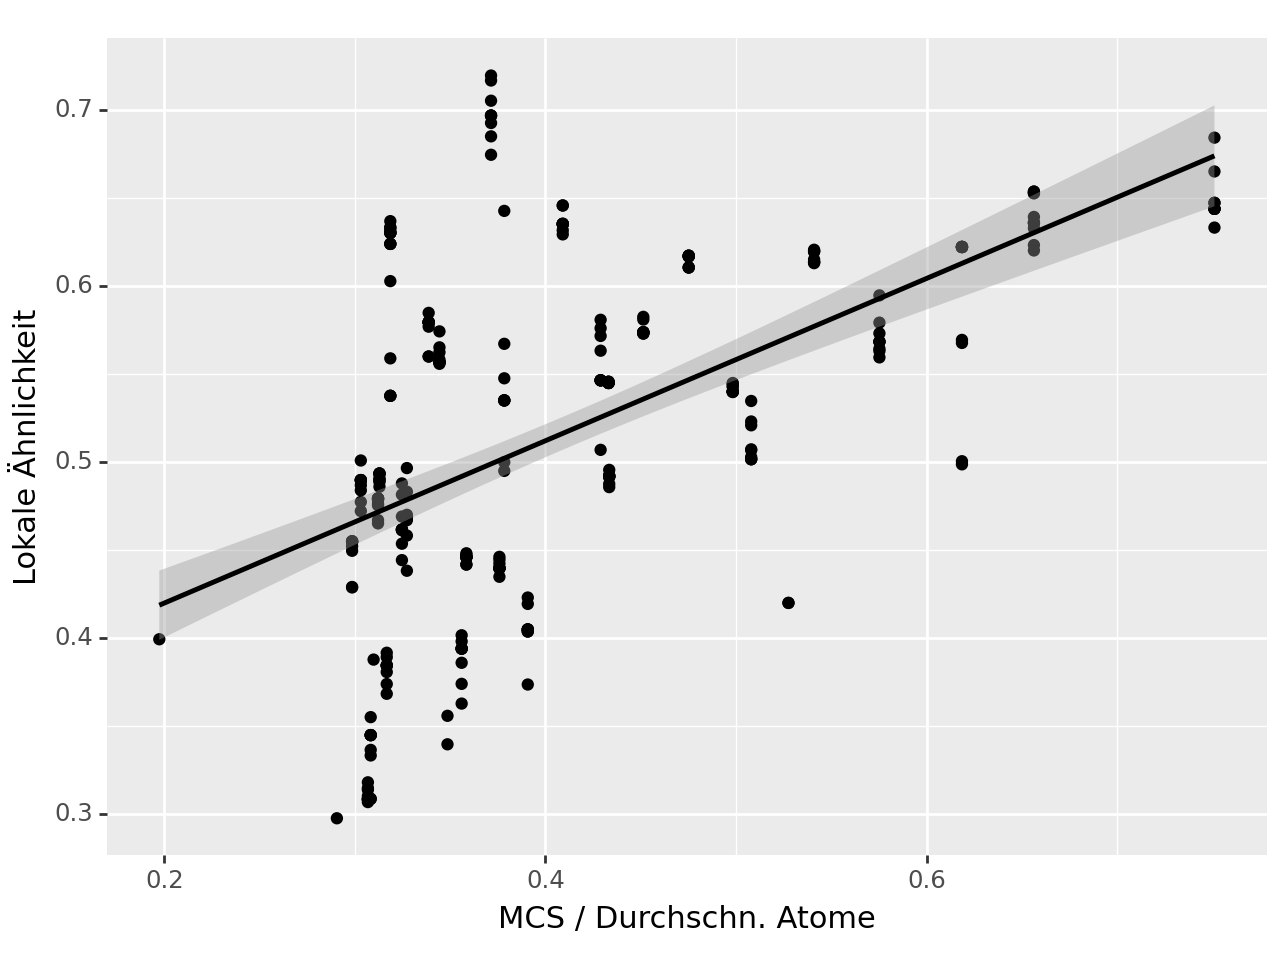

<Figure Size: (640 x 480)>

In [22]:
(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='local_similarity'))
 + geom_point()
 + geom_smooth(method='lm')
 + labs(x=lookup_de_name('mcs_size_to_atom_size'), y=lookup_de_name('local_similarity'))
 )

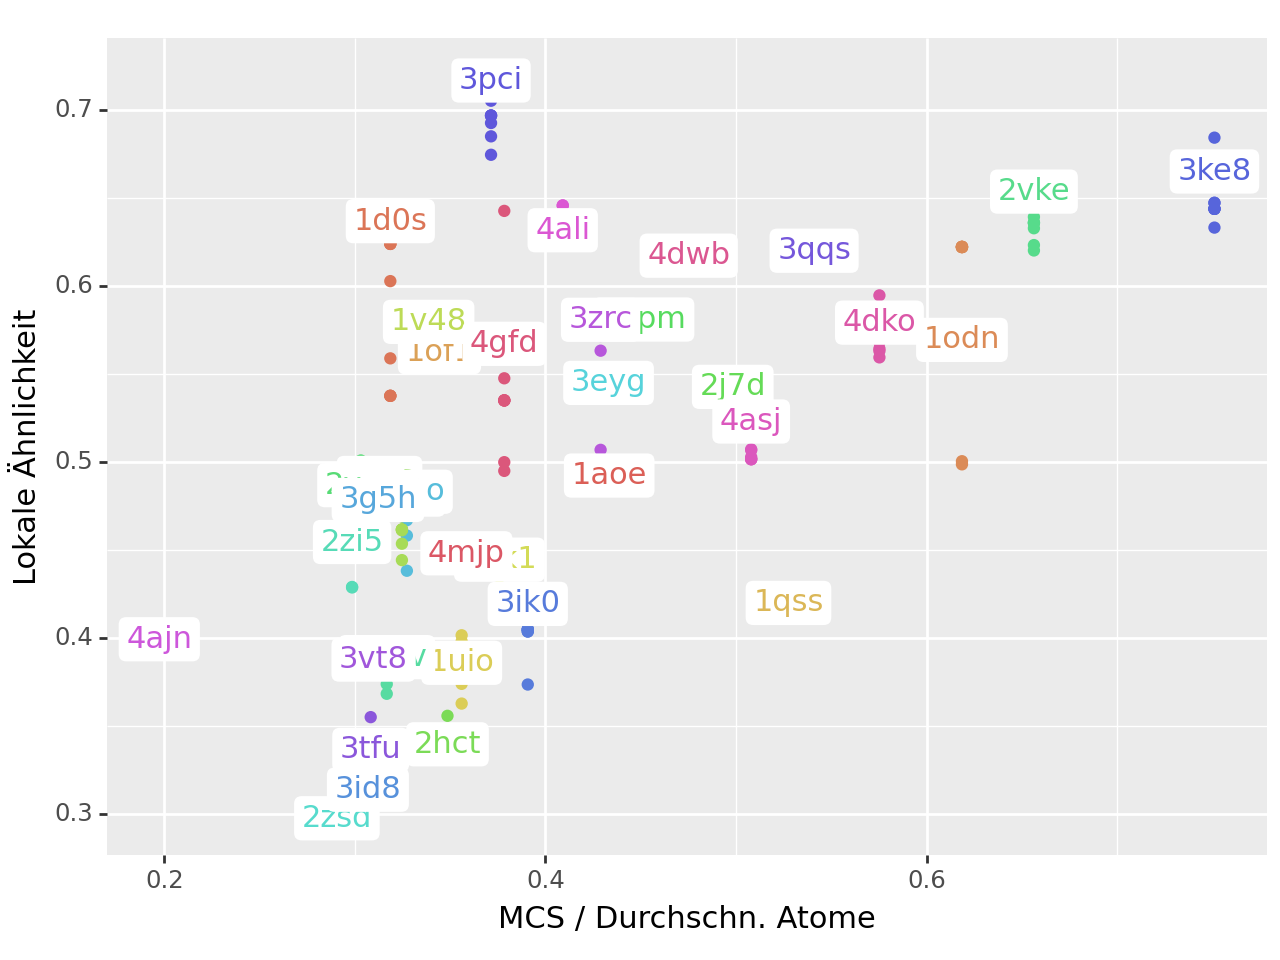

<Figure Size: (640 x 480)>

In [23]:
(ggplot(data=data, mapping=aes(x='mcs_size_to_atom_size', y='local_similarity',
                               colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(), boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 + labs(x=lookup_de_name('mcs_size_to_atom_size'), y=lookup_de_name('local_similarity'))
 )


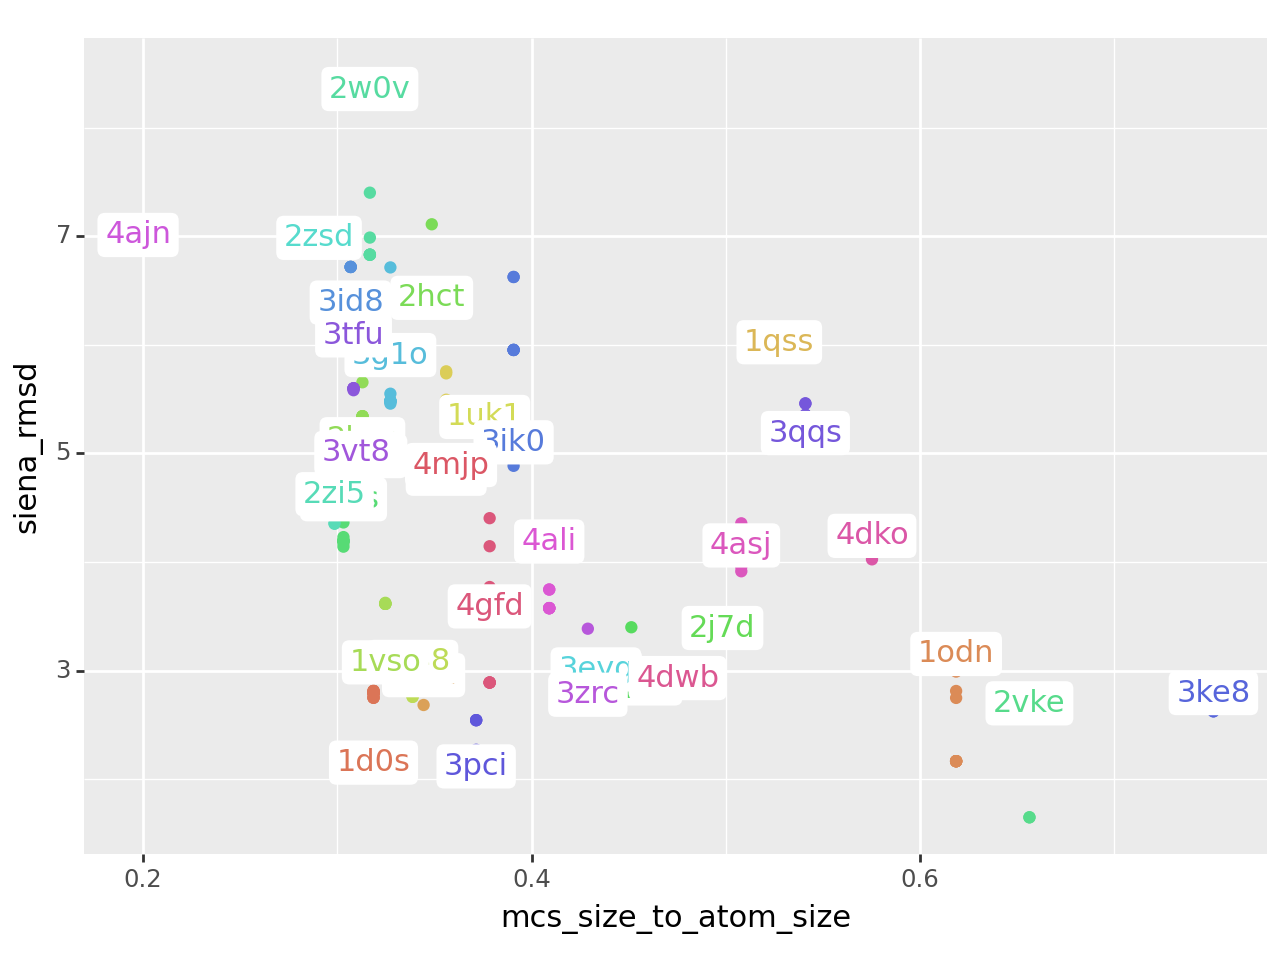

<Figure Size: (640 x 480)>

In [24]:
(ggplot(data=data,
        mapping=aes(x='mcs_size_to_atom_size', y='siena_rmsd', colour='name',
                    label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 )


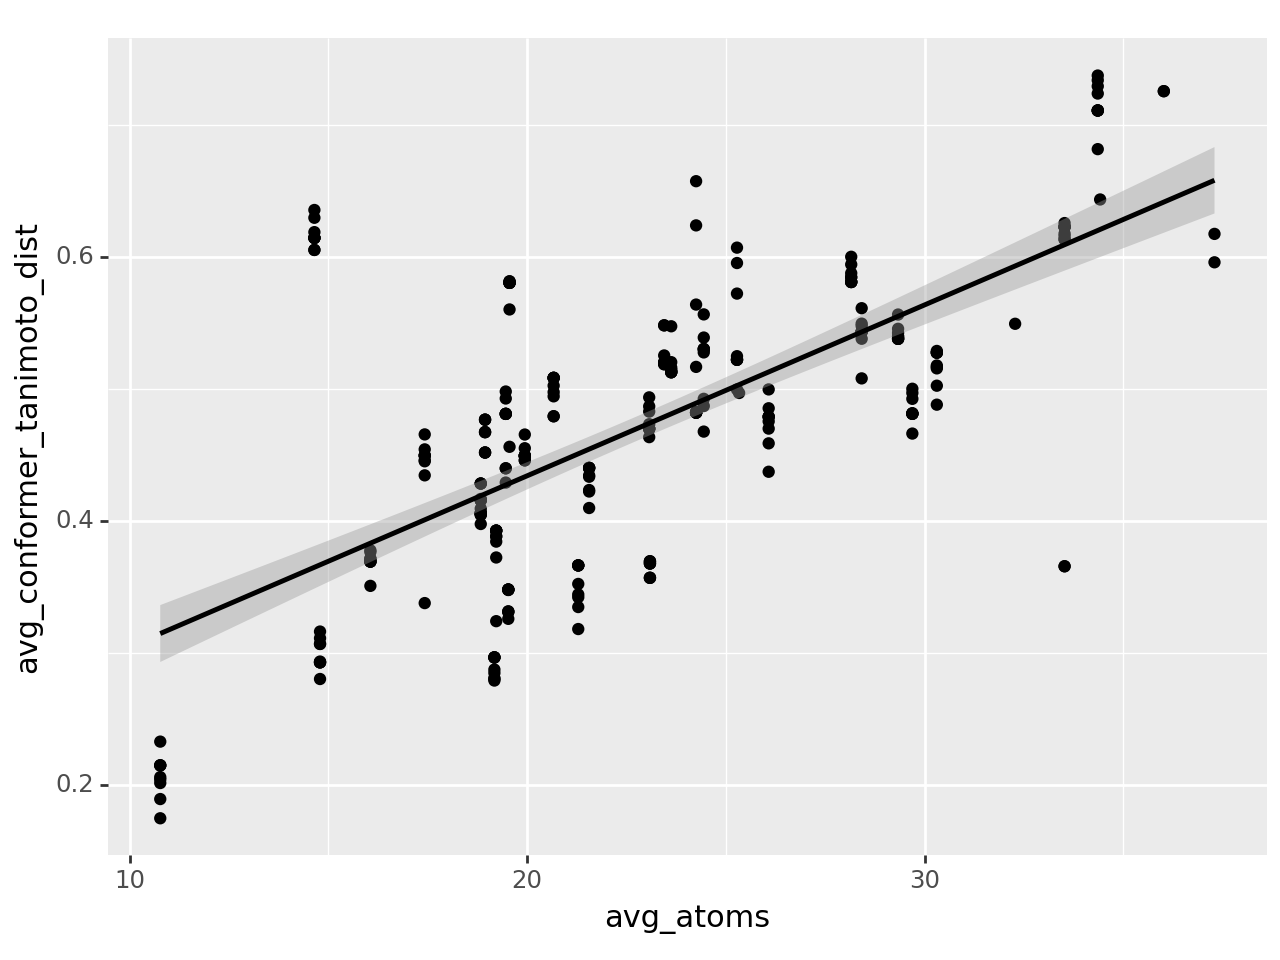

<Figure Size: (640 x 480)>

In [25]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='avg_conformer_tanimoto_dist'))
 + geom_point()
 + geom_smooth(method='lm'))

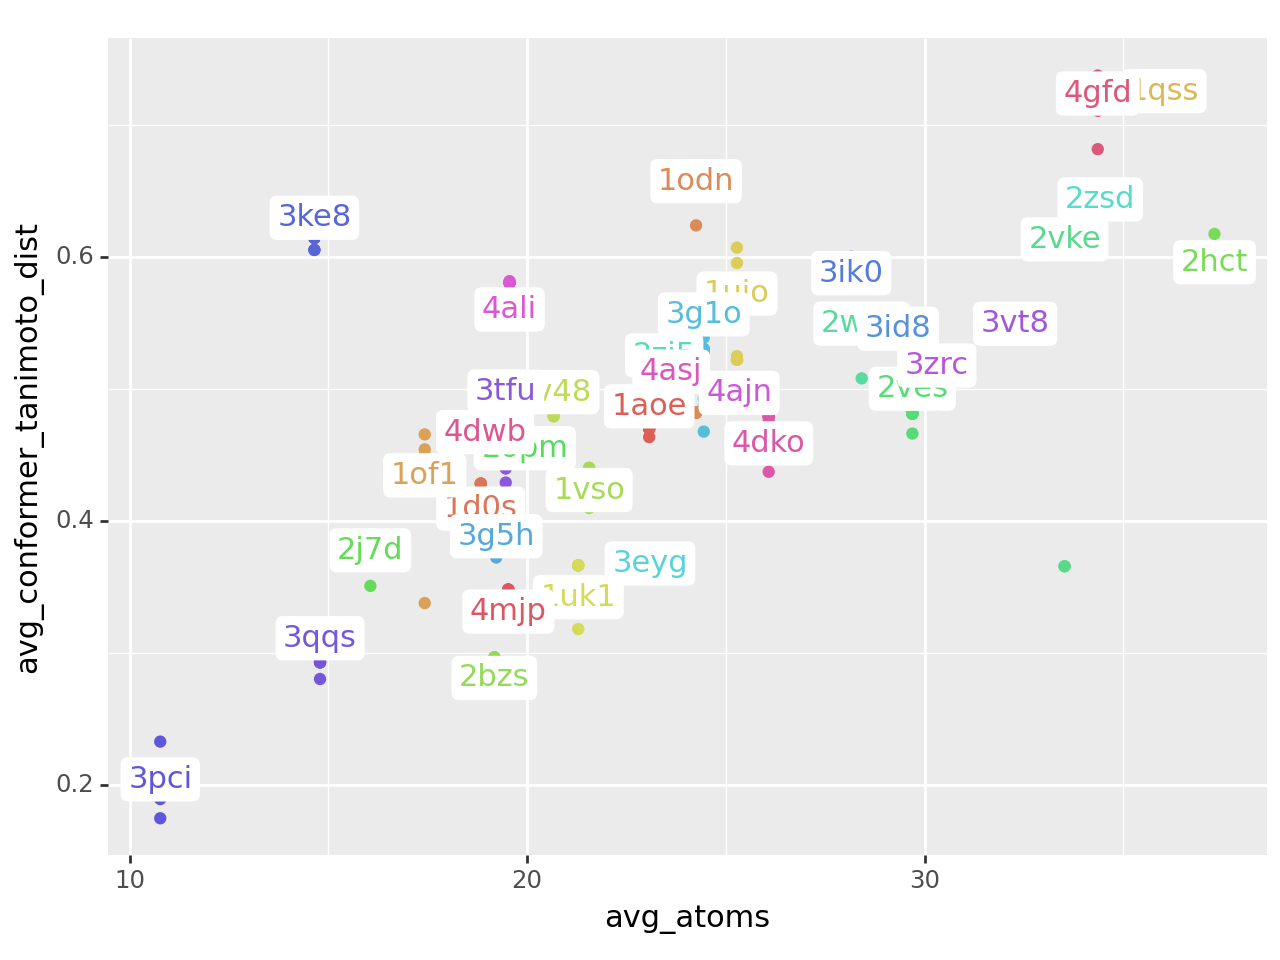

<Figure Size: (640 x 480)>

In [26]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='avg_conformer_tanimoto_dist',
                               colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 )


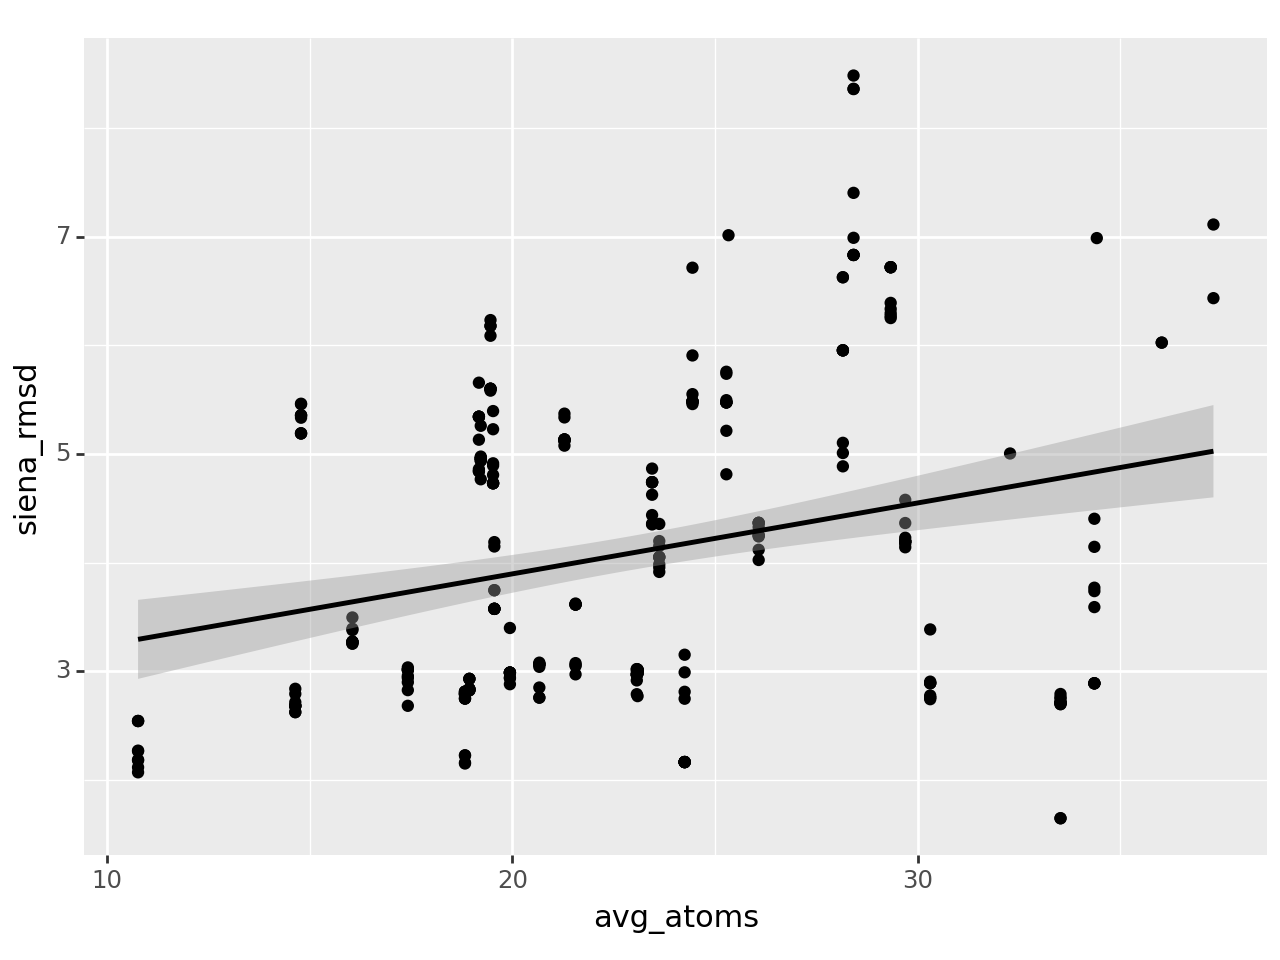

<Figure Size: (640 x 480)>

In [27]:
(ggplot(data=data, mapping=aes(x='avg_atoms', y='siena_rmsd'))
 + geom_point()
 + geom_smooth(method='lm'))

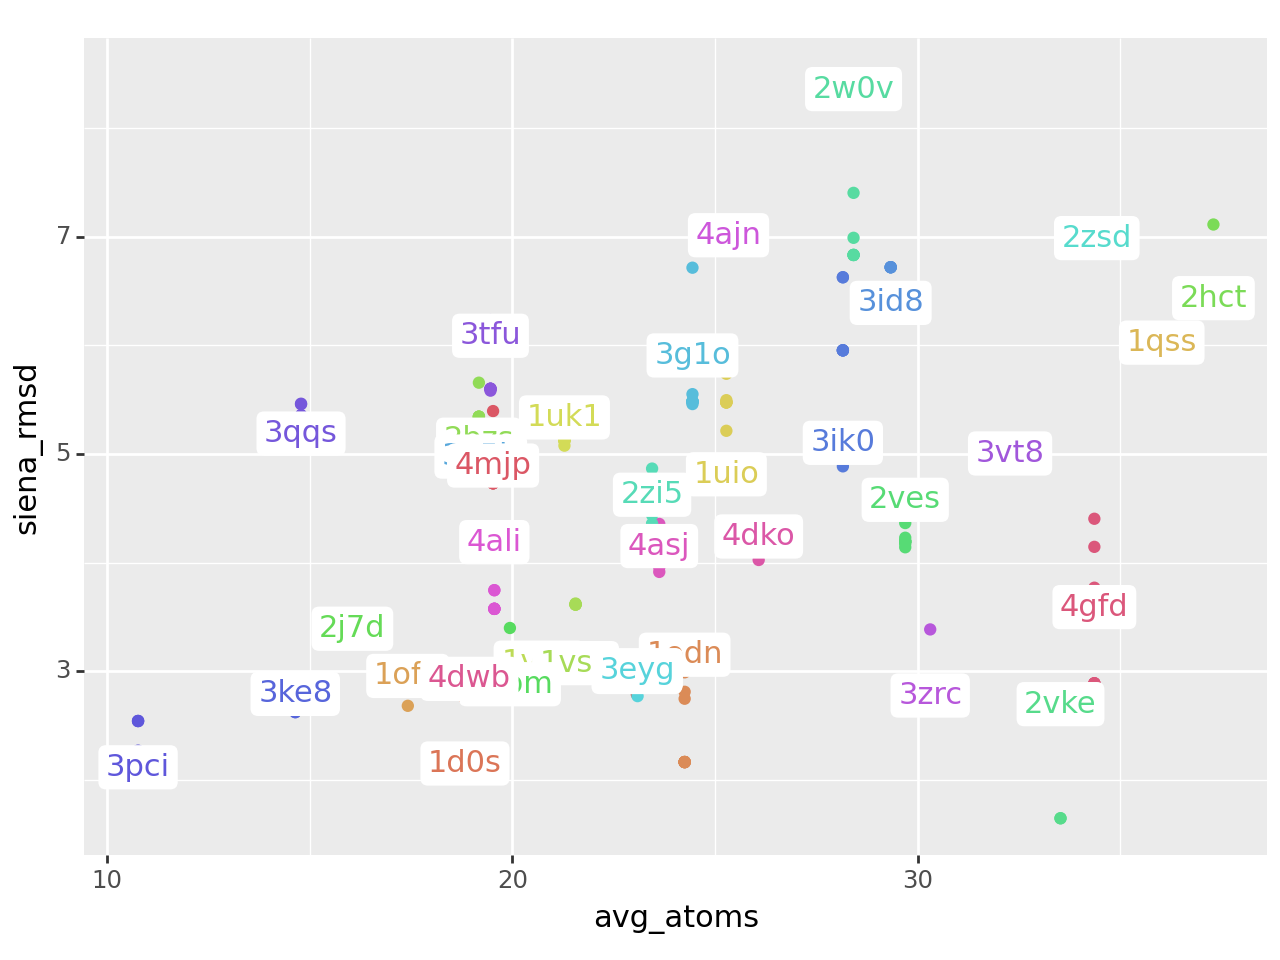

<Figure Size: (640 x 480)>

In [28]:
(ggplot(data=data,
        mapping=aes(x='avg_atoms', y='siena_rmsd', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 )


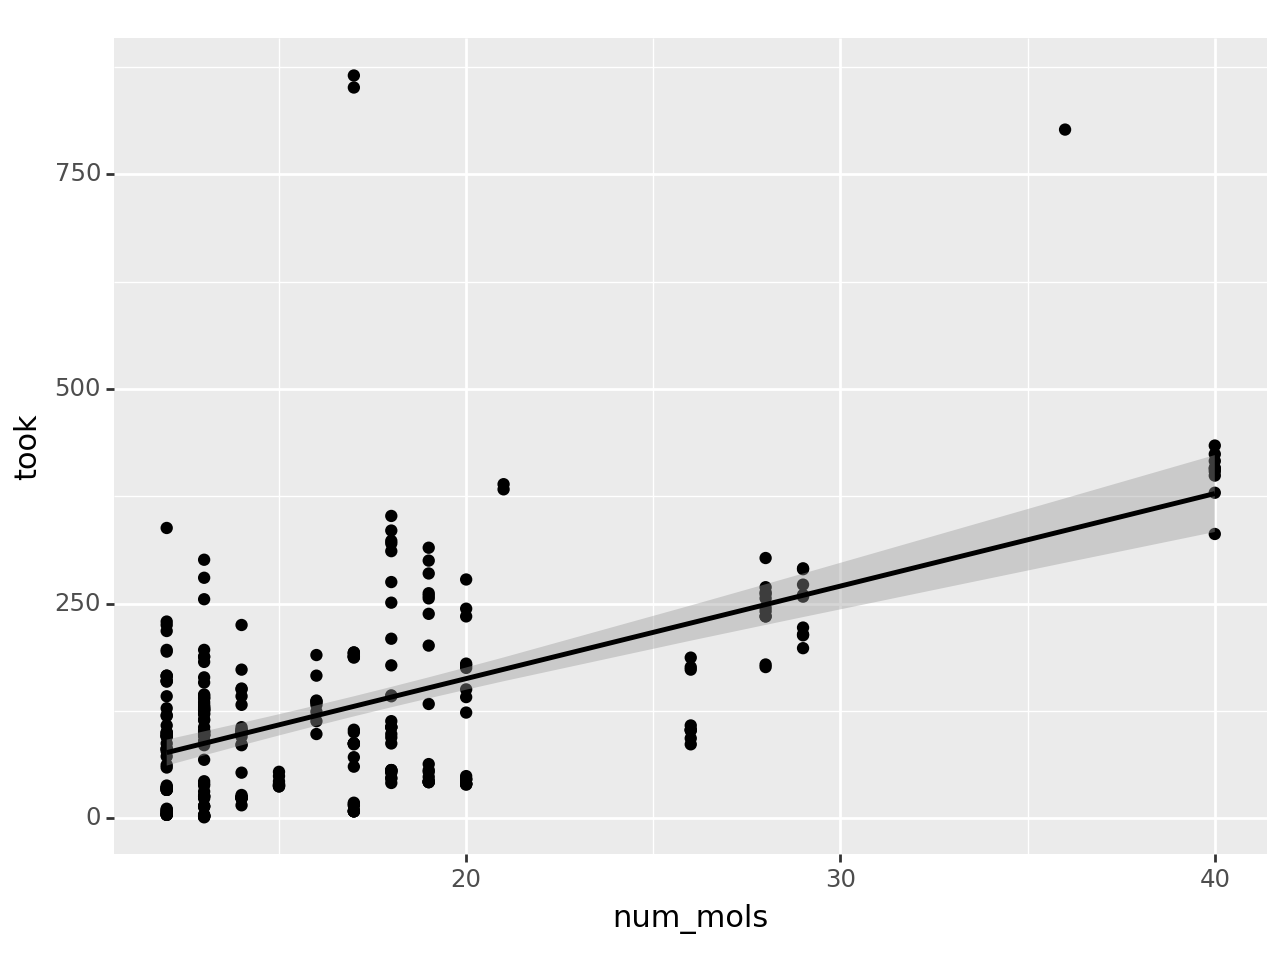

<Figure Size: (640 x 480)>

In [29]:
(ggplot(data=data, mapping=aes(x='num_mols', y='took'))
 + geom_point()
 + geom_smooth(method='lm'))

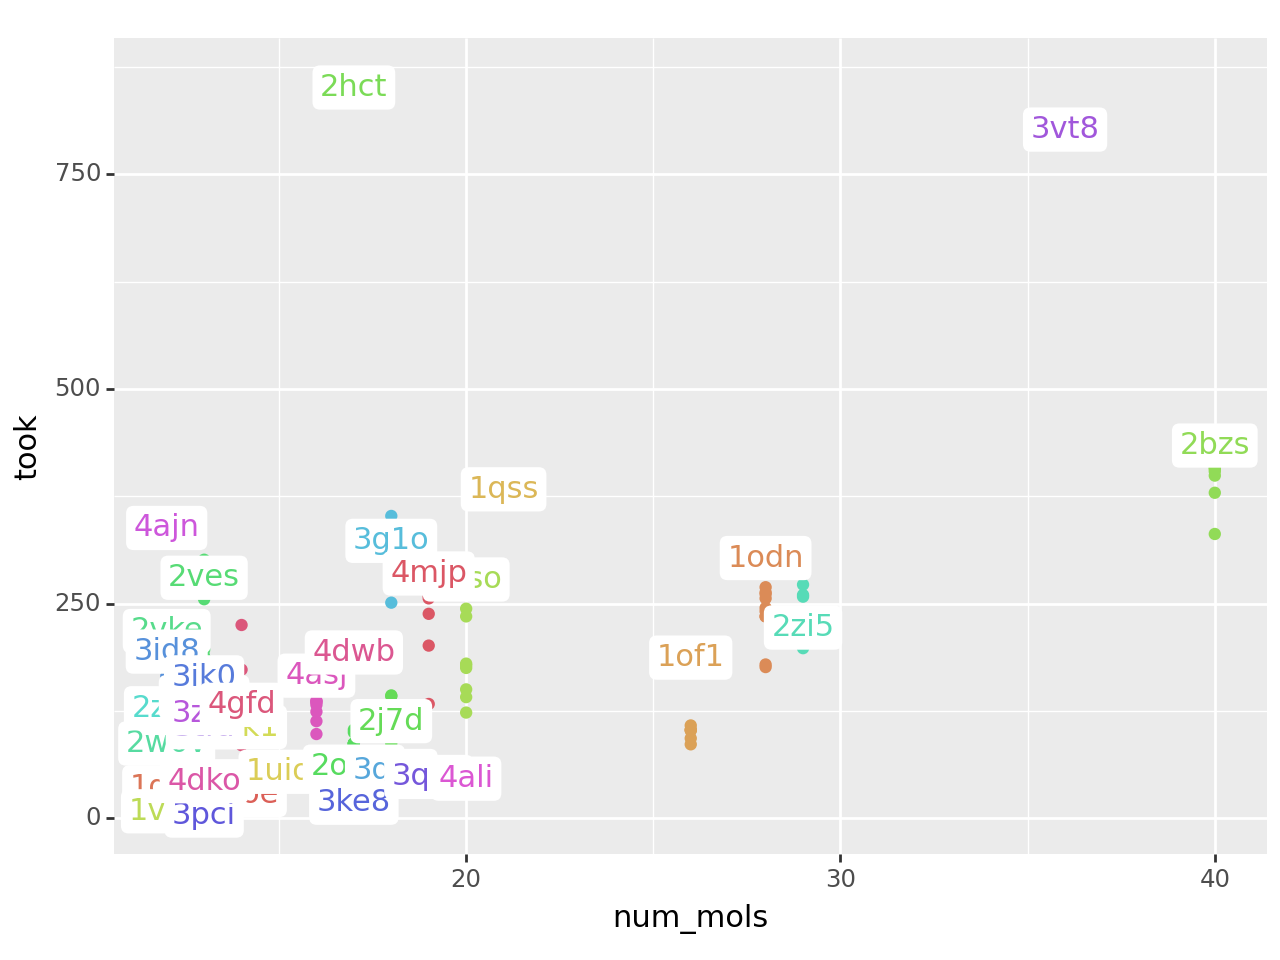

<Figure Size: (640 x 480)>

In [30]:
(ggplot(data=data,
        mapping=aes(x='num_mols', y='took', colour='name', label='name'))
 + geom_point()
 + geom_label(data=data.groupby('name').first().reset_index(),
              boxcolor=(1, 1, 1, 0))
 + scale_color_discrete(guide=False)
 )